1.Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



2.Load and Label the Data

In [ ]:
# Load Fake.csv - remove bad header row
fake = pd.read_csv("Fake.csv")
fake = fake.iloc[1:]
fake.columns = ["title", "text", "subject", "date"]

fake["label"] = "FAKE"

# Load True.csv
true = pd.read_csv("True.csv")
true["label"] = "REAL"




3.Combine and clean the data

In [ ]:
# Combine both datasets
df = pd.concat([fake, true], ignore_index=True)

df = df[['text', 'label']]

# Remove missing text entries
df.dropna(subset=['text'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Check the data
print(df.head())
print(df['label'].value_counts())



                                                text label
0  House Intelligence Committee Chairman Devin Nu...  FAKE
1  On Friday, it was revealed that former Milwauk...  FAKE
2  On Christmas day, Donald Trump announced that ...  FAKE
3  Pope Francis used his annual Christmas Day mes...  FAKE
4  The number of cases of cops brutalizing and ki...  FAKE
label
FAKE    23480
REAL    21417
Name: count, dtype: int64


4. Split and Vectorize the Text

In [ ]:
# Split data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)




5.Train the model

In [ ]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier(max_iter=50)

6.Evaluate the model

In [ ]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 99.62%
Confusion Matrix:
 [[4715   20]
 [  14 4231]]


7.Visualize the Confusion Matrix

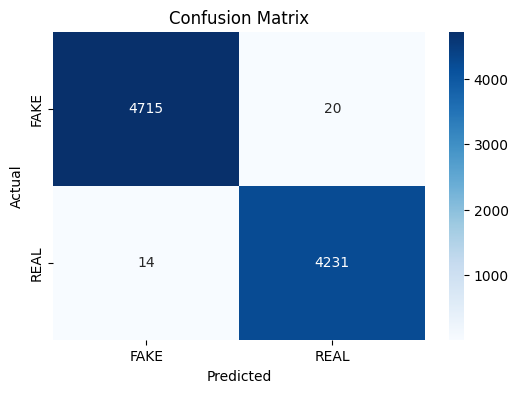

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save the model
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer too
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [ ]:
# Example input
sample_text = ["The president held a press conference on Friday to discuss economic policy."]

# Transform the input using the trained vectorizer
sample_vec = vectorizer.transform(sample_text)

# Predict
prediction = model.predict(sample_vec)
print("Prediction:", prediction[0])


Prediction: REAL
